#### Importing Packages

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import dataset 

In [4]:
mbti_data=pd.read_csv('mbti_1.csv')
mbti_data.columns

Index(['type', 'posts'], dtype='object')

In [5]:
mbti_data.type.value_counts(dropna=False)

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [6]:
frm_msg=pd.read_csv('ForumMessages.csv')
frm_msg.columns

Index(['Id', 'ForumTopicId', 'AuthorUserId', 'PostDate', 'Message',
       'ReplyToForumMessageId', 'TopicMessagePosition', 'RawMarkdown', 'Score',
       'FlaggedCount'],
      dtype='object')

In [7]:
frm_msg.FlaggedCount.value_counts(dropna=False)

0    90506
1      154
2       33
3        8
4        2
Name: FlaggedCount, dtype: int64

In [8]:
frm_msg.FlaggedCount.value_counts(dropna=False)

0    90506
1      154
2       33
3        8
4        2
Name: FlaggedCount, dtype: int64

In [9]:
frm_msg.Score.value_counts(dropna=False)

 0      60658
 1      14803
 2       5762
 3       2786
 4       1532
 5       1090
 6        732
 7        476
-1        405
 8        356
 10       275
 9        259
 11       167
-2        166
 12       131
 13       104
 14        95
-3         95
 15        78
-4         61
 16        58
-5         47
 21        43
 18        42
 17        37
-6         33
 19        32
-8         26
 20        24
 22        24
        ...  
 68         1
 58         1
 59         1
 62         1
 64         1
 140        1
-25         1
 77         1
-20         1
 101        1
 36         1
 96         1
-23         1
 94         1
-34         1
 41         1
 91         1
 154        1
 44         1
 49         1
 88         1
 108        1
-18         1
-17         1
 148        1
 84         1
 47         1
 112        1
 207        1
 63         1
Name: Score, Length: 106, dtype: int64

In [10]:
usr=pd.read_csv('Users.csv')
usr.columns

Index(['Id', 'UserName', 'DisplayName', 'RegisterDate', 'Points', 'Ranking',
       'Tier', 'HighestRanking'],
      dtype='object')

In [11]:
usr.HighestRanking.value_counts(dropna=False)

NaN         510132
 27059.0     14570
 28941.0       159
 2532.0         37
 157.0          22
 388.0          22
 161.0          22
 327.0          19
 2917.0         17
 10661.0        17
 2921.0         17
 1292.0         16
 690.0          16
 333.0          15
 896.0          15
 232.0          15
 172.0          15
 1.0            14
 1795.0         14
 200.0          14
 256.0          13
 12538.0        13
 80.0           13
 4762.0         13
 1592.0         13
 538.0          13
 3114.0         13
 130.0          13
 3257.0         13
 800.0          13
             ...  
 17953.0         1
 71810.0         1
 71774.0         1
 71775.0         1
 71777.0         1
 71778.0         1
 71779.0         1
 17945.0         1
 71782.0         1
 71783.0         1
 71784.0         1
 71785.0         1
 71786.0         1
 71790.0         1
 71791.0         1
 11504.0         1
 71793.0         1
 71794.0         1
 71795.0         1
 71796.0         1
 71797.0         1
 71798.0    

In [12]:
usr.Ranking.value_counts(dropna=False)

NaN         510138
 32767.0         1
 54670.0         1
 13666.0         1
 25888.0         1
 54665.0         1
 54666.0         1
 54667.0         1
 54668.0         1
 54669.0         1
 54671.0         1
 69444.0         1
 54672.0         1
 54673.0         1
 67700.0         1
 54674.0         1
 3713.0          1
 54675.0         1
 12022.0         1
 54663.0         1
 54662.0         1
 69448.0         1
 4573.0          1
 54650.0         1
 3413.0          1
 54651.0         1
 6307.0          1
 54652.0         1
 54653.0         1
 54654.0         1
             ...  
 77639.0         1
 19410.0         1
 77641.0         1
 77642.0         1
 77643.0         1
 19411.0         1
 77645.0         1
 77646.0         1
 77647.0         1
 19408.0         1
 77631.0         1
 77630.0         1
 77621.0         1
 77614.0         1
 77615.0         1
 4851.0          1
 77617.0         1
 77618.0         1
 77619.0         1
 19405.0         1
 77622.0         1
 77629.0    

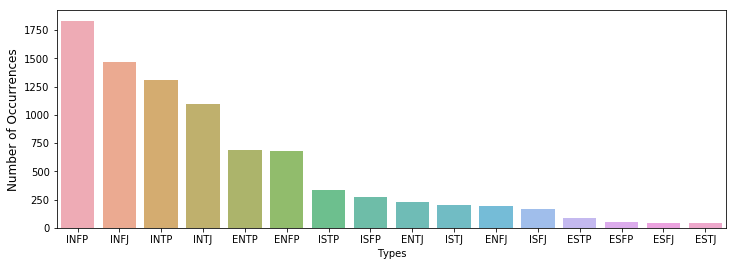

In [18]:
mbti_type = mbti_data['type'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(mbti_type.index, mbti_type.values, alpha=0.8)
plt.xlabel('Types', fontsize=10)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

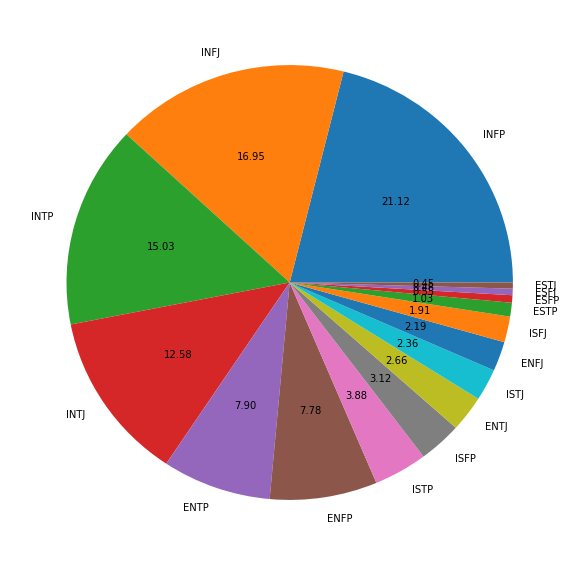

In [26]:
plt.subplots(figsize=(10,10))
plt.pie(x=mbti_type.values,labels=mbti_type.index,data=mbti_type, autopct='%.2f')
plt.show()

In [28]:
frm_msg['Message']= frm_msg['Message'].fillna('')

In [29]:
frm_msg[:5]

,Id,ForumTopicId,AuthorUserId,PostDate,Message,ReplyToForumMessageId,TopicMessagePosition,RawMarkdown,Score,FlaggedCount
0,1,1,478,2010-04-28 23:13:08,<div>In response to a comment on the No Free H...,NaN,1,NaN,0,0
1,76,1,808,2010-04-28 23:13:08,Use a mixture of different models (linear regr...,NaN,2,NaN,0,0
2,116,1,1486,2010-04-28 23:13:08,My first thoughts on this problem are that it ...,NaN,3,NaN,0,0
3,119,1,703,2010-04-28 23:13:08,The theory of deep belief networks is probably...,NaN,4,NaN,0,0
4,130,1,1486,2010-04-28 23:13:08,"Going by Hinton's last two google techtalks, r...",NaN,5,NaN,0,0


In [30]:
usr[:5]

,Id,UserName,DisplayName,RegisterDate,Points,Ranking,Tier,HighestRanking
0,1,kaggle,Kaggle,2011-03-24 02:17:07,NaN,NaN,1,NaN
1,368,antgoldbloom,Anthony Goldbloom,2010-01-20 01:07:25,981.099976,7055.0,4,75.0
2,381,iguyon,Isabelle,2010-01-29 20:07:37,308.399994,17576.0,4,2824.0
3,383,NaN,David Stephan,2010-02-01 04:03:43,NaN,NaN,1,NaN
4,384,NaN,Gabe Warren,2010-02-02 00:18:02,NaN,NaN,1,NaN


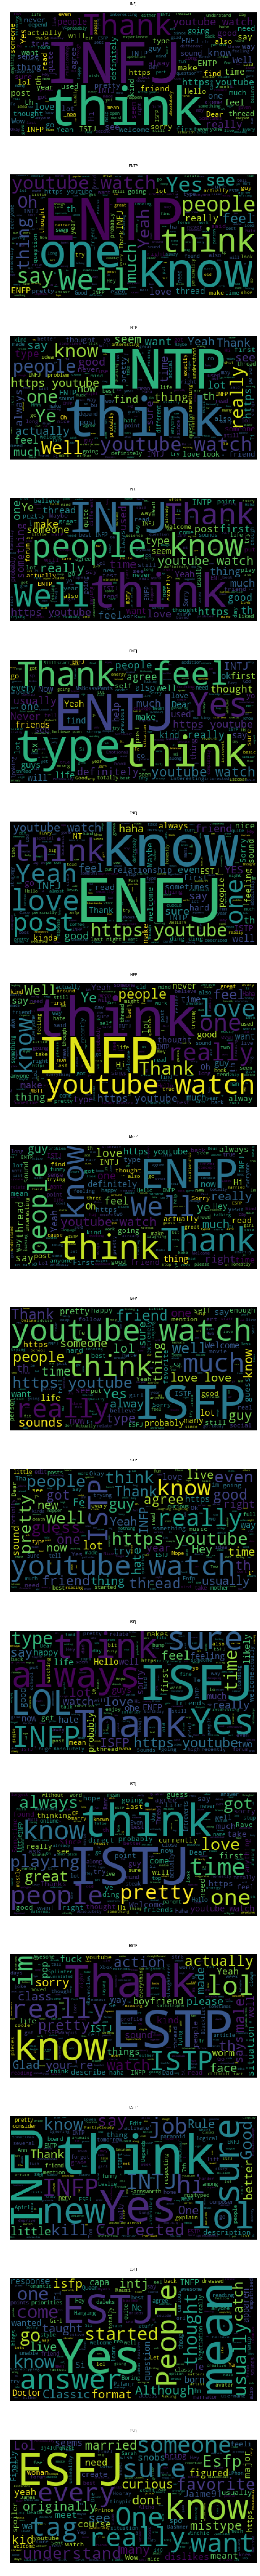

In [39]:
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS

fig, ax = plt.subplots(len(mbti_data['type'].unique()), sharex=True, figsize=(15,10*len(mbti_data['type'].unique())))

k = 0
for i in mbti_data['type'].unique():
    df_4 = mbti_data[mbti_data['type'] == i]
    wordcloud = WordCloud().generate(df_4['posts'].to_string())
    ax[k].imshow(wordcloud)
    ax[k].set_title(i)
    ax[k].axis("off")
    k+=1

plt.show()